## Preparation
As our training set, we use the images: 005, 019, 028, 036, 044, since they have varied numbers and sizes of cells.
For our test set, we use the images: 008, 017, 023.

Important: To run this notebook, please create the following folders in the same directory as the notebook and place the corresponding images and masks inside:

TRAINING_SET → contains the 5 training images

MASKS_SET → contains the corresponding masks for the training images

TEST_SET → contains the 3 test images

TEST_SET_MASKS → contains the corresponding masks for the test images

Alternatively, the attached folders can be used (with all images and masks already organized).

*The loops used to display images and segmentation results have been broken into smaller blocks to ensure that the outputs fit properly and can be printed without issues.*

In [ ]:
from glob import glob

TRAINING_DIR = "TRAINING_SET"
TRAIN_MASKS_DIR = "MASKS_SET"
TEST_DIR = "TEST_SET"
TEST_MASKS_DIR = "TEST_SET_MASKS"

MY_ID = 8397455

train_img_paths = sorted(glob(os.path.join(TRAINING_DIR, "*.png")))
train_mask_paths = sorted(glob(os.path.join(TRAIN_MASKS_DIR, "*.png")))
test_img_paths  = sorted(glob(os.path.join(TEST_DIR, "*.png")))
test_mask_paths = sorted(glob(os.path.join(TEST_MASKS_DIR, "*.png")))

print(f"Found {len(train_img_paths)} training images, {len(test_img_paths)} test images.")
if len(train_img_paths) == 0:
    raise RuntimeError("No training images found.")
if len(test_img_paths) == 0:
    raise RuntimeError("No test images found.")

Found 5 training images, 3 test images.


## Development

###Task 0: Pre-processing
The images are already in grayscale. We apply Gaussian smoothing to reduce high frequency noise while preserving the overall structure of the image, such as cell nuclei. Additionally, we perform morphological erosion to eliminate small isolated noise pixels and to help separate closely spaced nuclei, improving the clarity of the features for subsequent analysis.

In [ ]:
from skimage import io, img_as_float, img_as_ubyte
from skimage.filters import gaussian
from skimage.morphology import erosion, disk
import matplotlib.pyplot as plt
import numpy as np

def preprocess(img):
    imgf = img_as_float(img)
    smoothed = gaussian(imgf, sigma=1) # gaussian smoothing
    eroded = erosion(smoothed, disk(1)) # erosion
    return eroded

preprocessed_train = [] # smoothed + eroded
original_train = [] # raw originals

for path in train_img_paths:
    img = io.imread(path)
    pre = preprocess(img)
    preprocessed_train.append(pre)
    original_train.append(img)

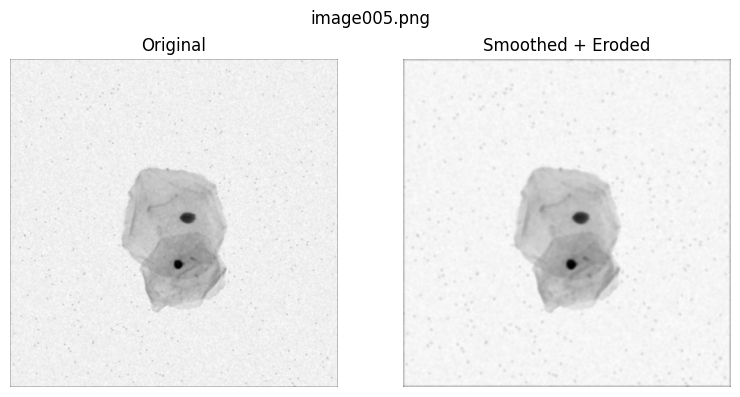

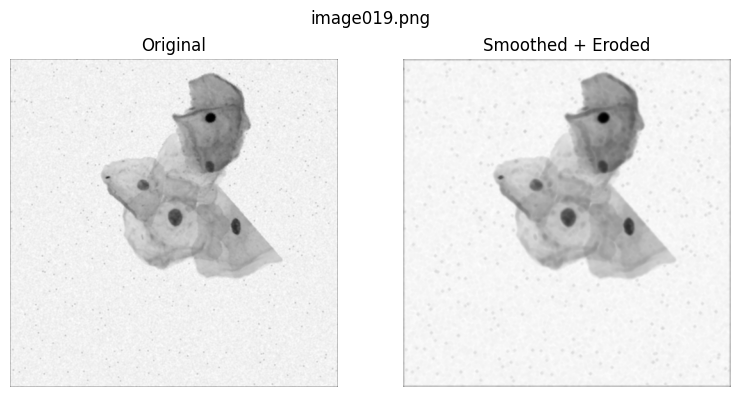

In [ ]:
for i in range(0, 2):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(original_train[i], cmap='gray')
    axes[0].set_title("Original")
    axes[0].axis("off")

    axes[1].imshow(preprocessed_train[i], cmap='gray')
    axes[1].set_title("Smoothed + Eroded")
    axes[1].axis("off")

    plt.suptitle(os.path.basename(train_img_paths[i]))
    plt.tight_layout()
    plt.show()

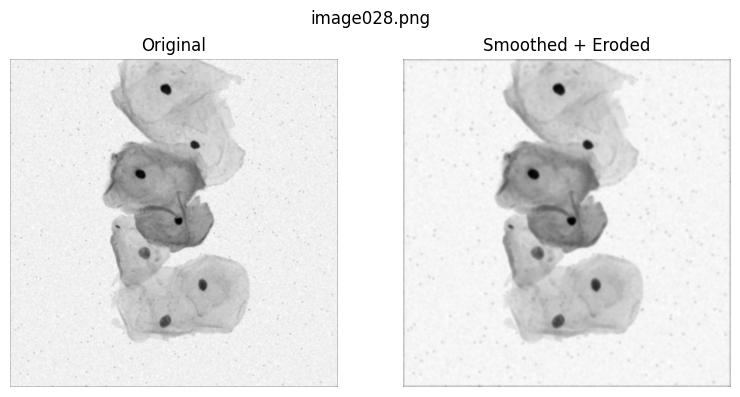

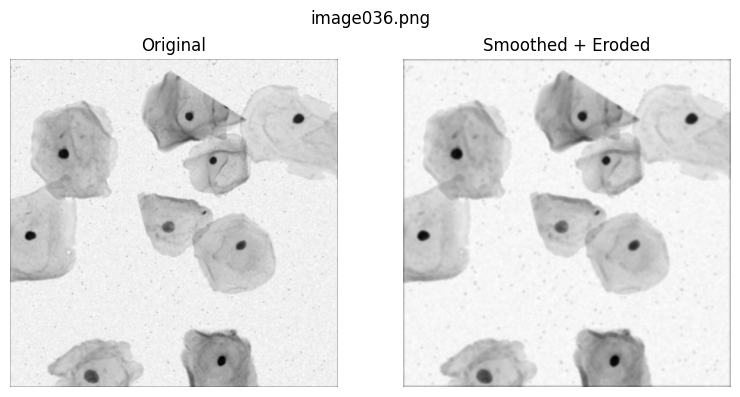

In [ ]:
for i in range(2, 4):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(original_train[i], cmap='gray')
    axes[0].set_title("Original")
    axes[0].axis("off")

    axes[1].imshow(preprocessed_train[i], cmap='gray')
    axes[1].set_title("Smoothed + Eroded")
    axes[1].axis("off")

    plt.suptitle(os.path.basename(train_img_paths[i]))
    plt.tight_layout()
    plt.show()

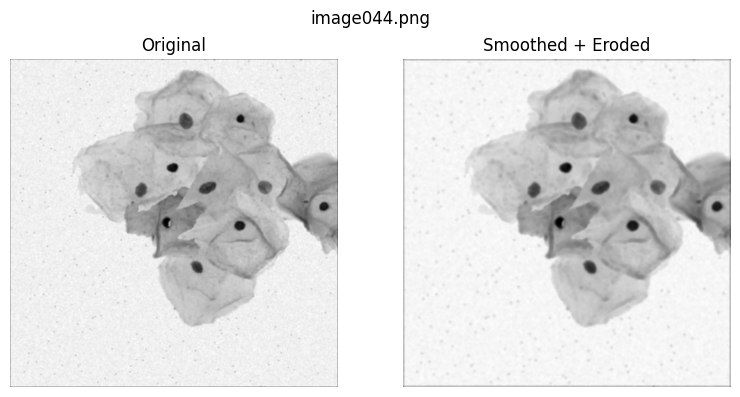

In [ ]:
i = 4
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(original_train[i], cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(preprocessed_train[i], cmap='gray')
axes[1].set_title("Smoothed + Eroded")
axes[1].axis("off")

plt.suptitle(os.path.basename(train_img_paths[i]))
plt.tight_layout()
plt.show()

np.save("preprocessed_train.npy", preprocessed_train, allow_pickle=True)

### Task 1: Basic Thresholding

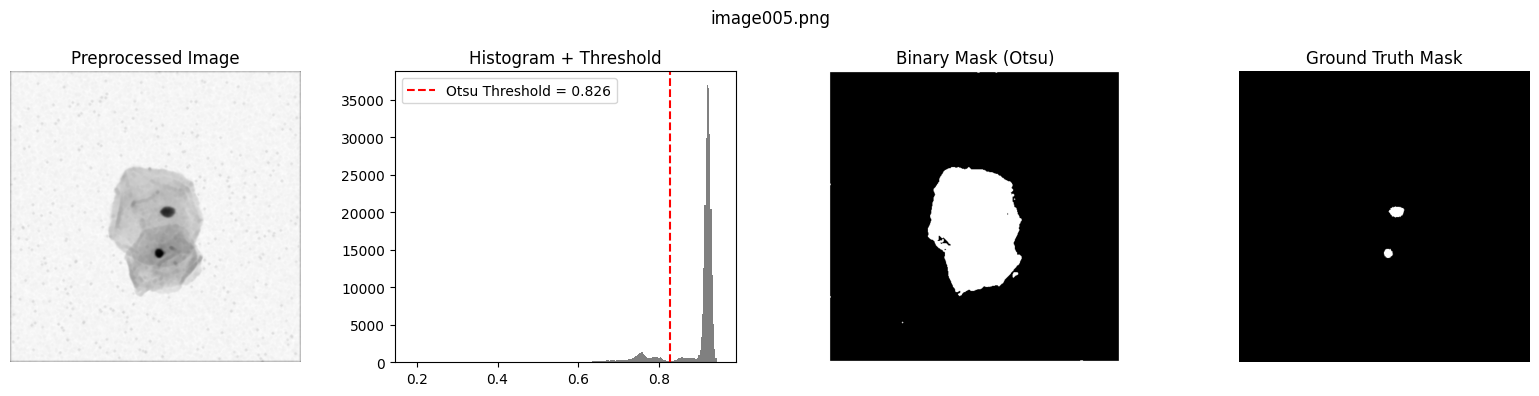

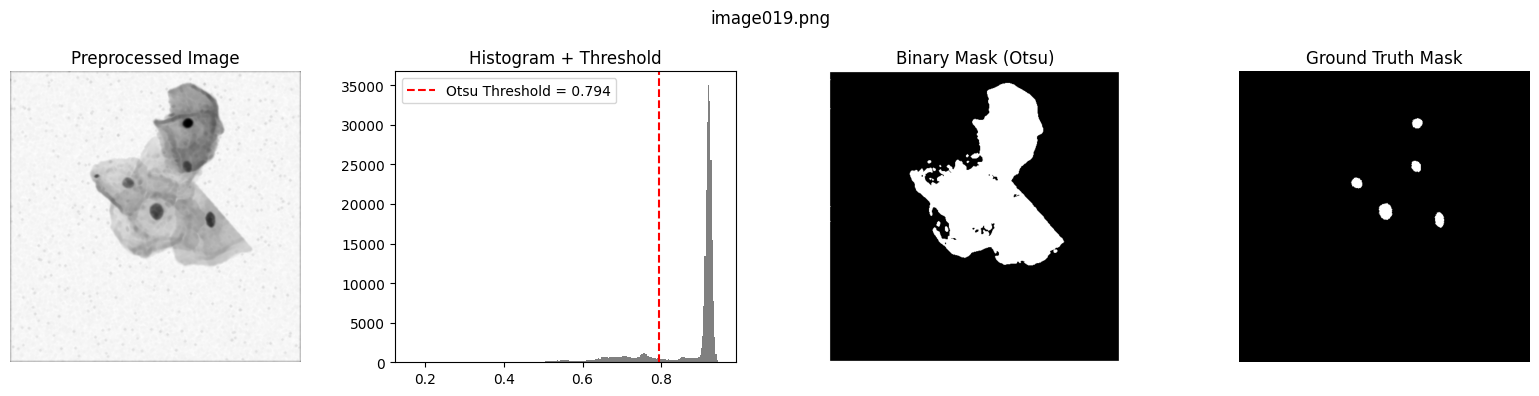

In [ ]:
from skimage.filters import threshold_otsu
import os

otsu_thresholds = []
otsu_masks = []

for i in range(0, 2):
    t = threshold_otsu(preprocessed_train[i])
    otsu_thresholds.append(t)

    binary = preprocessed_train[i] < t
    otsu_masks.append(binary)

    mask = io.imread(train_mask_paths[i]) > 0

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    axes[0].imshow(preprocessed_train[i], cmap='gray')
    axes[0].set_title("Preprocessed Image")
    axes[0].axis("off")

    axes[1].hist(preprocessed_train[i].ravel(), bins=256, color='gray')
    axes[1].axvline(t, color='red', linestyle='--', label=f"Otsu Threshold = {t:.3f}")
    axes[1].legend()
    axes[1].set_title("Histogram + Threshold")

    axes[2].imshow(binary, cmap='gray')
    axes[2].set_title("Binary Mask (Otsu)")
    axes[2].axis("off")

    axes[3].imshow(mask, cmap='gray')
    axes[3].set_title("Ground Truth Mask")
    axes[3].axis("off")

    plt.suptitle(os.path.basename(train_img_paths[i]))
    plt.tight_layout()
    plt.show()

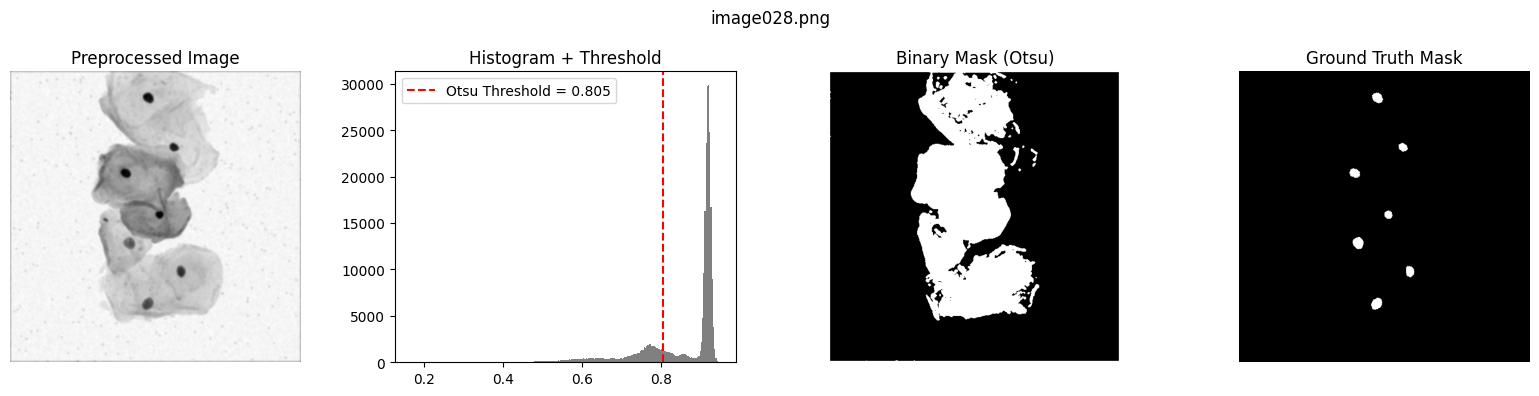

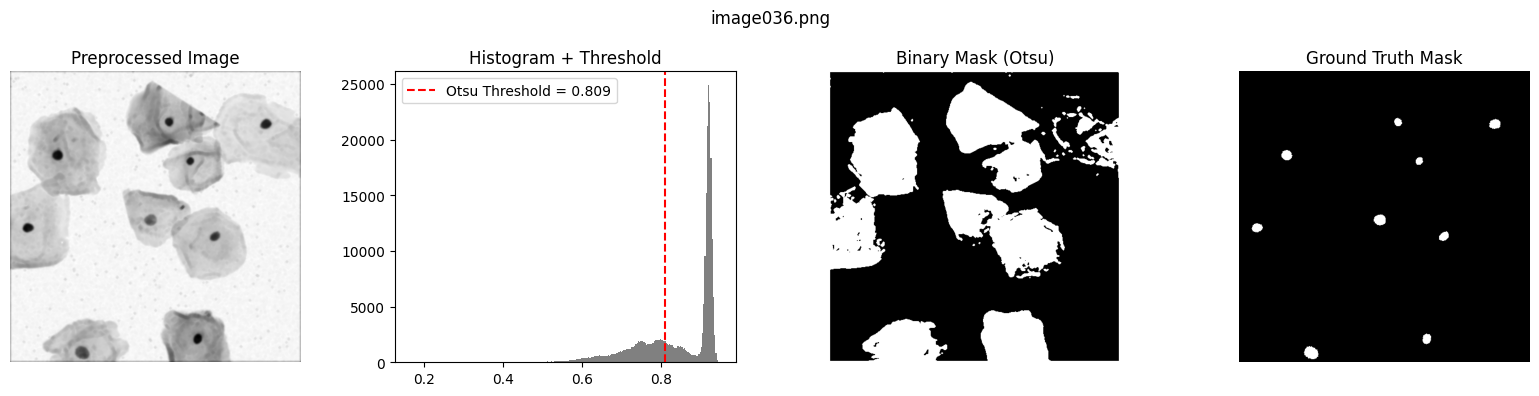

In [ ]:
for i in range(2, 4):
    t = threshold_otsu(preprocessed_train[i])
    otsu_thresholds.append(t)

    binary = preprocessed_train[i] < t
    otsu_masks.append(binary)

    mask = io.imread(train_mask_paths[i]) > 0

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    axes[0].imshow(preprocessed_train[i], cmap='gray')
    axes[0].set_title("Preprocessed Image")
    axes[0].axis("off")

    axes[1].hist(preprocessed_train[i].ravel(), bins=256, color='gray')
    axes[1].axvline(t, color='red', linestyle='--', label=f"Otsu Threshold = {t:.3f}")
    axes[1].legend()
    axes[1].set_title("Histogram + Threshold")

    axes[2].imshow(binary, cmap='gray')
    axes[2].set_title("Binary Mask (Otsu)")
    axes[2].axis("off")

    axes[3].imshow(mask, cmap='gray')
    axes[3].set_title("Ground Truth Mask")
    axes[3].axis("off")

    plt.suptitle(os.path.basename(train_img_paths[i]))
    plt.tight_layout()
    plt.show()

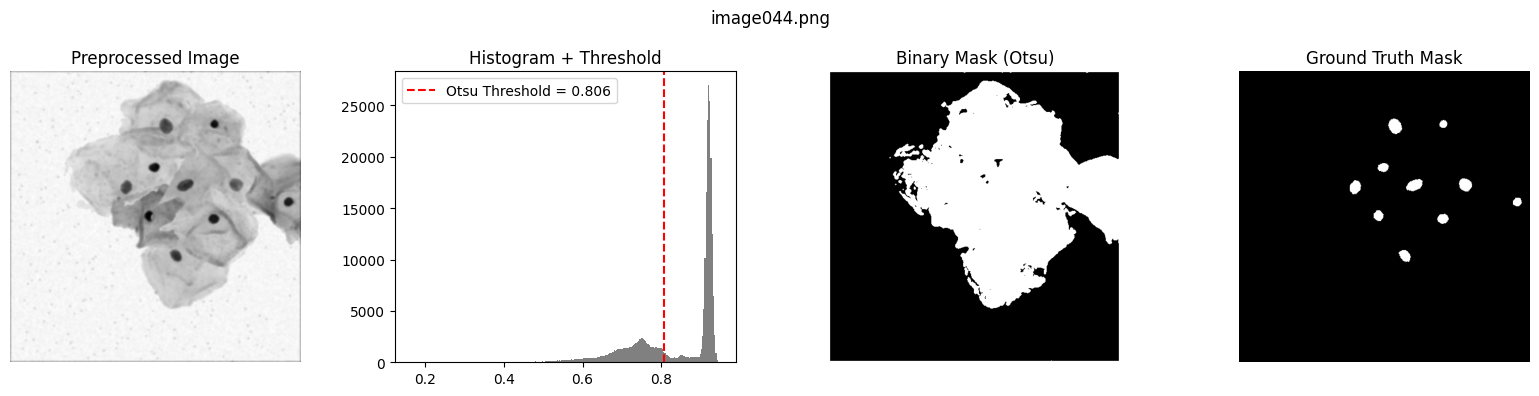

In [ ]:
i = 4
t = threshold_otsu(preprocessed_train[i])
otsu_thresholds.append(t)

binary = preprocessed_train[i] < t
otsu_masks.append(binary)

mask = io.imread(train_mask_paths[i]) > 0

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(preprocessed_train[i], cmap='gray')
axes[0].set_title("Preprocessed Image")
axes[0].axis("off")

axes[1].hist(preprocessed_train[i].ravel(), bins=256, color='gray')
axes[1].axvline(t, color='red', linestyle='--', label=f"Otsu Threshold = {t:.3f}")
axes[1].legend()
axes[1].set_title("Histogram + Threshold")

axes[2].imshow(binary, cmap='gray')
axes[2].set_title("Binary Mask (Otsu)")
axes[2].axis("off")

axes[3].imshow(mask, cmap='gray')
axes[3].set_title("Ground Truth Mask")
axes[3].axis("off")

plt.suptitle(os.path.basename(train_img_paths[i]))
plt.tight_layout()
plt.show()

The histogram shows the distribution of pixel intensities in the smoothed image (float values 0–1). The red dashed line is the Otsu threshold, indicating the separation of background from foreground. The thresholds of the images are between t = 0.794 and t = 0.826.

There is a sharp peak on the right (0.9) of all the histograms, corresponding to the background pixels of the images (most of the image is background). A smaller peak on the left (~0.65–0.7) corresponds to the cells and nuclei.

We additionally visualize the binary mask where nuclei cells are white and background is black and notice some small artifacts or holes appear inside nuclei. This could be due to intensity variations inside nuclei.

### Task 2: Unsupervised Clustering

We compute the module of the ID: `8397455 % 3 = 2`, therefore Guassian Mixture is used to segment the nuclei.


In [ ]:
print(MY_ID % 3)

2


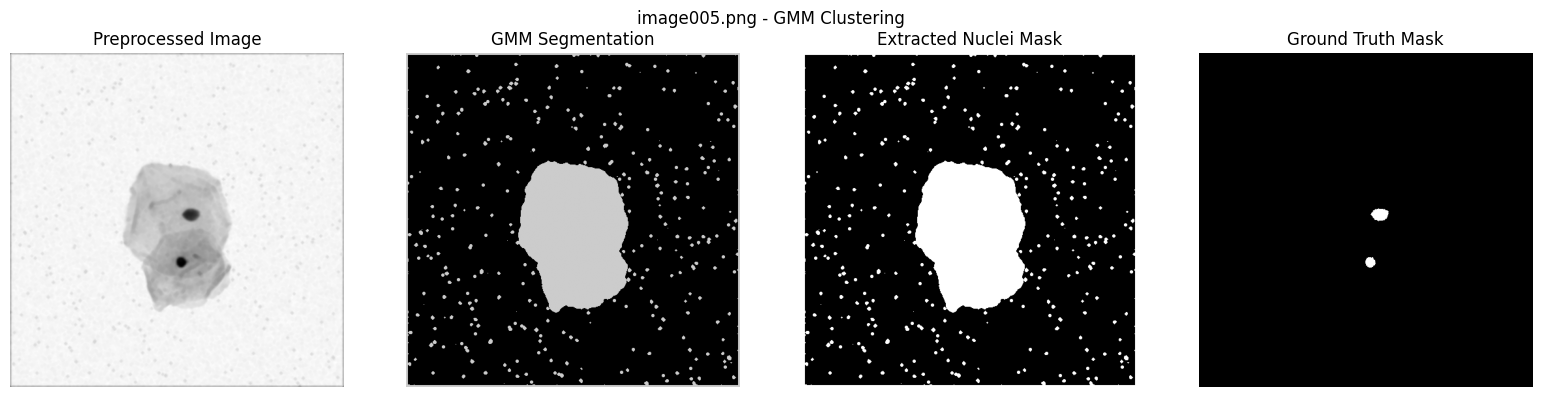

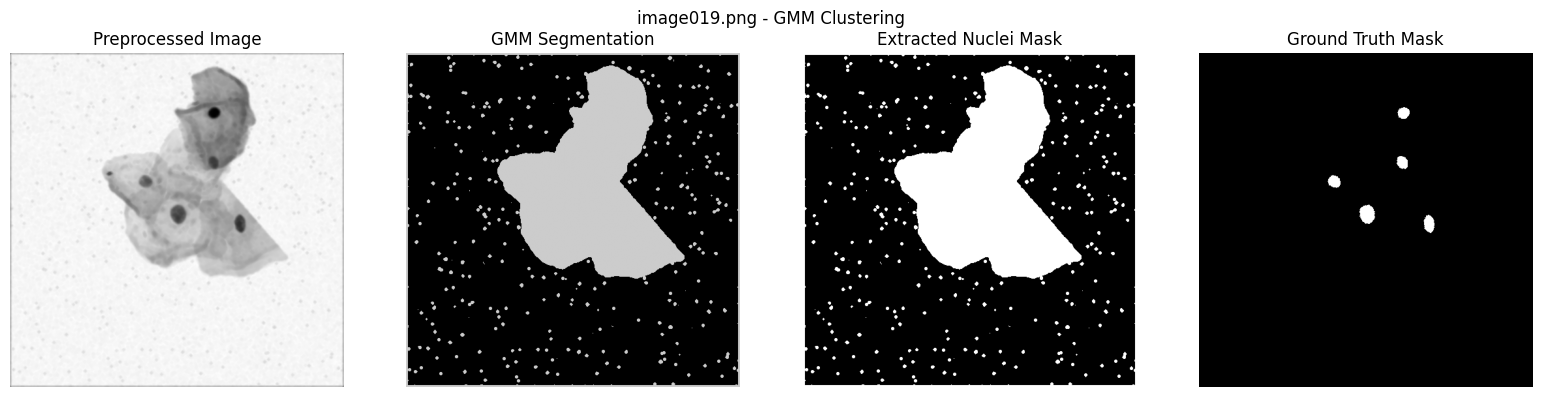

In [ ]:
from sklearn.mixture import GaussianMixture
from skimage import img_as_float

gmm_masks = []

for i in range(0, 2):
    # flatten image for clustering
    img_flat = img_as_float(preprocessed_train[i]).reshape(-1, 1)

    # apply GMM (2 clusters: nuclei vs background)
    gmm = GaussianMixture(n_components=2, random_state=MY_ID)
    gmm.fit(img_flat)
    labels = gmm.predict(img_flat)

    # reshape labels back to image shape
    segmented = labels.reshape(preprocessed_train[i].shape)

    # assign darker cluster as nuclei
    cluster_means = gmm.means_.flatten()
    nuclei_label = np.argmin(cluster_means)
    nuclei_mask = segmented == nuclei_label
    gmm_masks.append(nuclei_mask)

    mask = io.imread(train_mask_paths[i]) > 0

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    axes[0].imshow(preprocessed_train[i], cmap='gray')
    axes[0].set_title("Preprocessed Image")
    axes[0].axis("off")

    axes[1].imshow(segmented, cmap='nipy_spectral')
    axes[1].set_title("GMM Segmentation")
    axes[1].axis("off")

    axes[2].imshow(nuclei_mask, cmap='gray')
    axes[2].set_title("Extracted Nuclei Mask")
    axes[2].axis("off")

    axes[3].imshow(mask, cmap='gray')
    axes[3].set_title("Ground Truth Mask")
    axes[3].axis("off")

    plt.suptitle(f"{os.path.basename(train_img_paths[i])} - GMM Clustering")
    plt.tight_layout()
    plt.show()

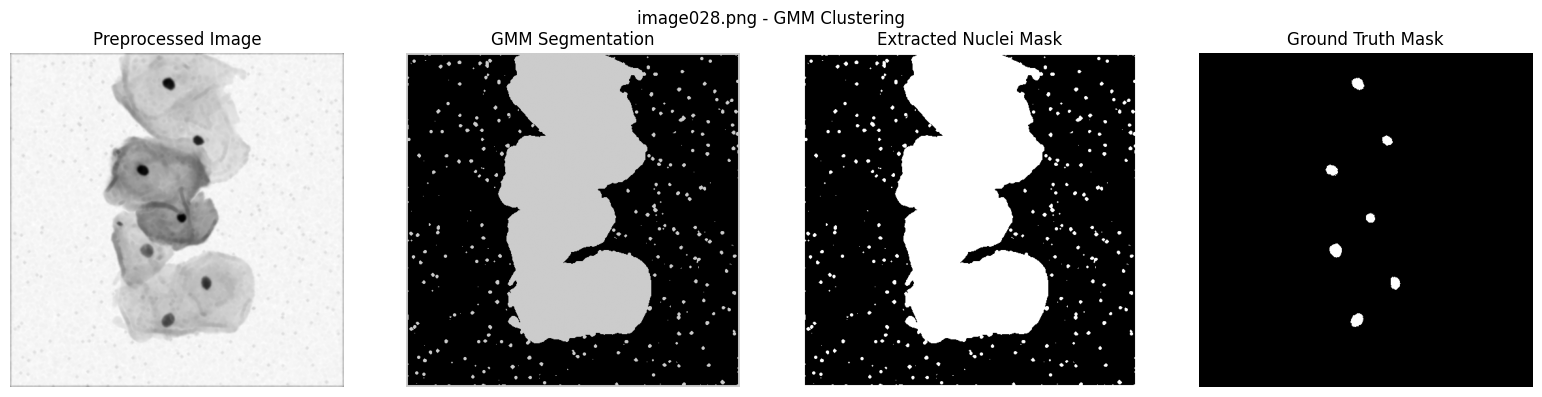

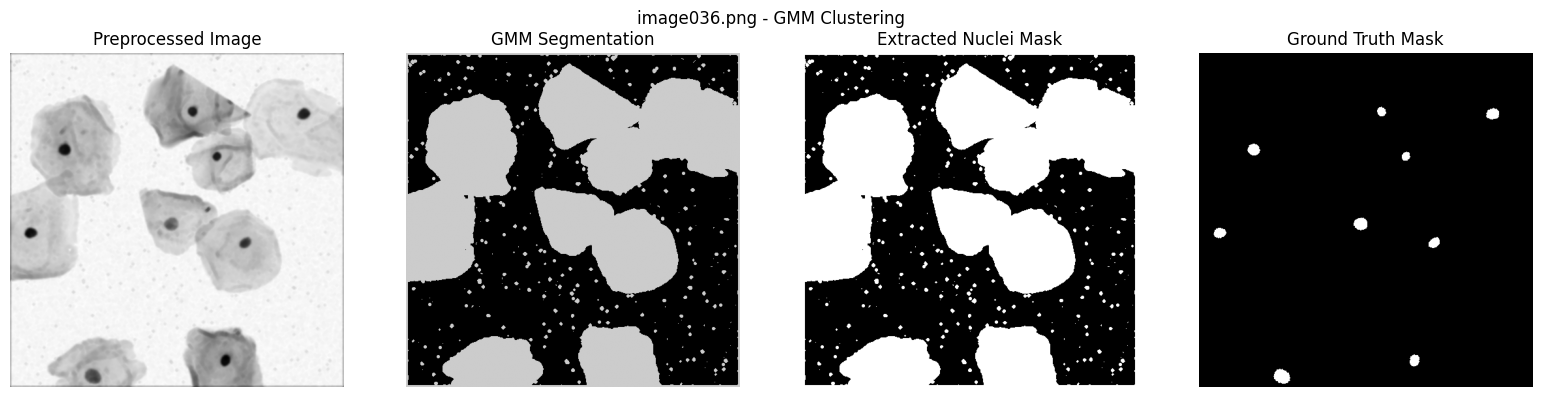

In [ ]:
for i in range(2, 4):
    img_flat = img_as_float(preprocessed_train[i]).reshape(-1, 1)
    gmm = GaussianMixture(n_components=2, random_state=MY_ID)
    gmm.fit(img_flat)
    labels = gmm.predict(img_flat)
    segmented = labels.reshape(preprocessed_train[i].shape)
    cluster_means = gmm.means_.flatten()
    nuclei_label = np.argmin(cluster_means)
    nuclei_mask = segmented == nuclei_label
    gmm_masks.append(nuclei_mask)

    mask = io.imread(train_mask_paths[i]) > 0

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    axes[0].imshow(preprocessed_train[i], cmap='gray')
    axes[0].set_title("Preprocessed Image")
    axes[0].axis("off")

    axes[1].imshow(segmented, cmap='nipy_spectral')
    axes[1].set_title("GMM Segmentation")
    axes[1].axis("off")

    axes[2].imshow(nuclei_mask, cmap='gray')
    axes[2].set_title("Extracted Nuclei Mask")
    axes[2].axis("off")

    axes[3].imshow(mask, cmap='gray')
    axes[3].set_title("Ground Truth Mask")
    axes[3].axis("off")

    plt.suptitle(f"{os.path.basename(train_img_paths[i])} - GMM Clustering")
    plt.tight_layout()
    plt.show()

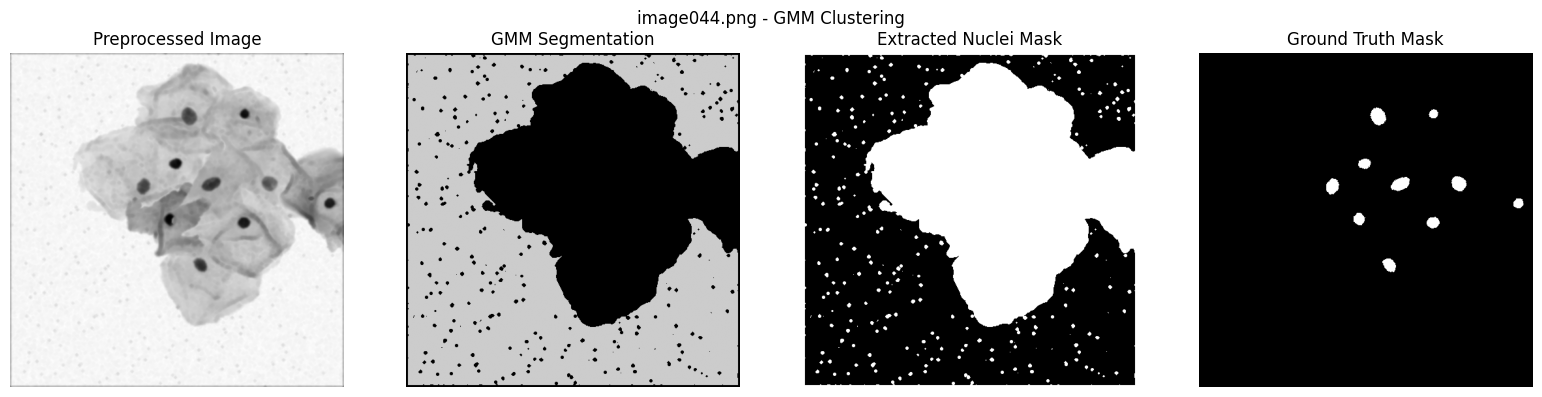

In [ ]:
i = 4
img_flat = img_as_float(preprocessed_train[i]).reshape(-1, 1)
gmm = GaussianMixture(n_components=2, random_state=MY_ID)
gmm.fit(img_flat)
labels = gmm.predict(img_flat)
segmented = labels.reshape(preprocessed_train[i].shape)
cluster_means = gmm.means_.flatten()
nuclei_label = np.argmin(cluster_means)
nuclei_mask = segmented == nuclei_label
gmm_masks.append(nuclei_mask)

mask = io.imread(train_mask_paths[i]) > 0

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(preprocessed_train[i], cmap='gray')
axes[0].set_title("Preprocessed Image")
axes[0].axis("off")

axes[1].imshow(segmented, cmap='nipy_spectral')
axes[1].set_title("GMM Segmentation")
axes[1].axis("off")

axes[2].imshow(nuclei_mask, cmap='gray')
axes[2].set_title("Extracted Nuclei Mask")
axes[2].axis("off")

axes[3].imshow(mask, cmap='gray')
axes[3].set_title("Ground Truth Mask")
axes[3].axis("off")

plt.suptitle(f"{os.path.basename(train_img_paths[i])} - GMM Clustering")
plt.tight_layout()
plt.show()

np.save("gmm_masks_train.npy", gmm_masks, allow_pickle=True)

The predicted masks are larger than the ground truth because the algorithms segment all pixels with nucleus-like intensity, while the ground truth only includes the high-confidence nucleus core. This is due to a combination of preprocessing blurring, intensity-based classification, and annotation style.

In particular, the GMM segmentation labels small isolated dots outside the actual nuclei as well, unlike Otsu. This occurs because GMM models the pixel intensities as two Gaussian distributions; even a few scattered pixels with intensities similar to nuclei can be assigned to the “nucleus cluster,” producing tiny false positives. Otsu, on the other hand, uses a global threshold and is less sensitive to isolated outlier pixels, so it avoids these extra dots.

###  Task 3: Supervised Segmentation

Since possport number is uneven, we develop a QDA model - The QDA model predicts nuclei by learning the intensity distribution of nucleus versus background pixels from the training images, allowing it to classify each pixel based on how likely it belongs to either class.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda_model = QDA()
X_train, y_train = [], []

for img_path in train_img_paths:
    img_name = os.path.basename(img_path)
    mask_name = img_name.replace("image", "mask")
    mask_path = os.path.join(TRAIN_MASKS_DIR, mask_name)

    img = io.imread(img_path)
    mask = io.imread(mask_path) > 0  # boolean mask

    # flatten for pixel-wise classification
    X_train.append(img.reshape(-1, 1))
    y_train.append(mask.reshape(-1))

X_train = np.vstack(X_train)
y_train = np.hstack(y_train)

qda_model.fit(X_train, y_train)
print("QDA model trained on pixel intensities.")


QDA model trained on pixel intensities.


Apply QDA to test images

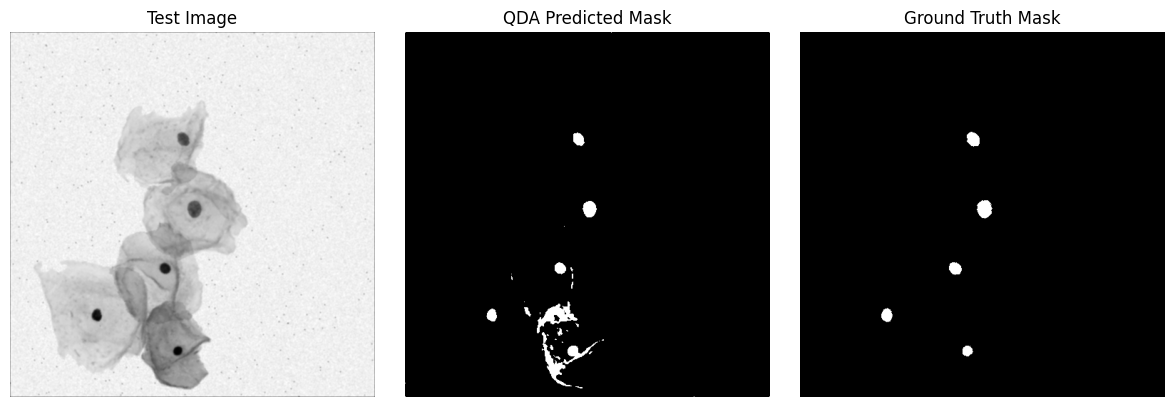

In [ ]:
pred_masks_test = []  # store predicted masks
gt_masks_test = []    # store corresponding ground truth masks
test_img_names = []

for i in range(0, min(2, len(test_img_paths))):
    test_img_name = os.path.basename(test_img_paths[i])
    test_img = io.imread(test_img_paths[i])

    # QDA prediction
    pred_mask = qda_model.predict(test_img.reshape(-1,1)).reshape(test_img.shape).astype(bool)
    pred_masks_test.append(pred_mask)

    # load ground truth mask
    test_mask_path = os.path.join(TEST_MASKS_DIR, test_img_name.replace("image","mask"))
    if os.path.exists(test_mask_path):
        gt_mask = io.imread(test_mask_path) > 0
        gt_masks_test.append(gt_mask)
    else:
        gt_mask = None
        gt_masks_test.append(None)

    test_img_names.append(test_img_name)

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(test_img, cmap='gray')
    axes[0].set_title("Test Image")
    axes[0].axis("off")

    axes[1].imshow(pred_mask, cmap='gray')
    axes[1].set_title("QDA Predicted Mask")
    axes[1].axis("off")

    if gt_mask is not None:
        axes[2].imshow(gt_mask, cmap='gray')
        axes[2].set_title("Ground Truth Mask")
    else:
        axes[2].text(0.5, 0.5, "No Ground Truth Available", ha="center", va="center", fontsize=12)
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

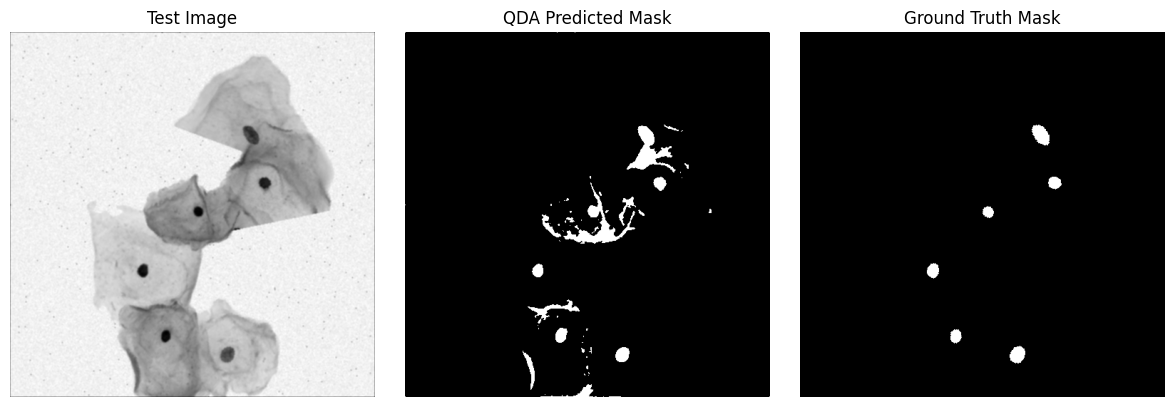

In [ ]:
for i in range(2, len(test_img_paths)):
    test_img_name = os.path.basename(test_img_paths[i])
    test_img = io.imread(test_img_paths[i])

    # QDA prediction
    pred_mask = qda_model.predict(test_img.reshape(-1,1)).reshape(test_img.shape).astype(bool)
    pred_masks_test.append(pred_mask)

    # load ground truth mask
    test_mask_path = os.path.join(TEST_MASKS_DIR, test_img_name.replace("image","mask"))
    if os.path.exists(test_mask_path):
        gt_mask = io.imread(test_mask_path) > 0
        gt_masks_test.append(gt_mask)
    else:
        gt_mask = None
        gt_masks_test.append(None)

    test_img_names.append(test_img_name)

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(test_img, cmap='gray')
    axes[0].set_title("Test Image")
    axes[0].axis("off")

    axes[1].imshow(pred_mask, cmap='gray')
    axes[1].set_title("QDA Predicted Mask")
    axes[1].axis("off")

    if gt_mask is not None:
        axes[2].imshow(gt_mask, cmap='gray')
        axes[2].set_title("Ground Truth Mask")
    else:
        axes[2].text(0.5, 0.5, "No Ground Truth Available", ha="center", va="center", fontsize=12)
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

The QDA-predicted masks capture the full cores of the cells while also including some of the surrounding nuclear area. This makes them more similar to the ground truth masks than the Otsu or GMM predictions, which either over-segment (GMM) or under-segment (Otsu) the nuclei. Overall, the supervised QDA model produces a better match to the annotated nucleus regions because it has learned the intensity distribution of nuclei from the training images.

### Task 4: Final Testing

Dice score and Jaccard index are used as similarity measures to compare the predicted masks with the ground truth masks, quantifying how well the segmentation matches the actual nuclei in the test set. They both range from 0 (no overlap) to 1 (perfect overlap).

#### Dice Score

The Dice score measures the overlap between two binary masks.

$$
Dice(A, B) = \frac{2 \cdot |A \cap B|}{|A| + |B|}
$$

---

#### Jaccard Index (Intersection over Union)

The Jaccard Index, measures the ratio of the intersection to the union of two masks.

$$
Jaccard(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$

---

Where:  
- \(A\) is the ground truth mask  
- \(B\) is the predicted mask  
- \(|A \cap B|\) is the number of overlapping pixels  
- \(|A|\) and \(|B|\) are the number of pixels in each mask  
- \(|A \cup B|\) is the total number of pixels that are 1 in either mask  

In [ ]:
def dice_score(y_true, y_pred):
    # y_true, y_pred: boolean arrays
    y_true = y_true.astype(bool)
    y_pred = y_pred.astype(bool)
    inter = np.logical_and(y_true, y_pred).sum()
    denom = y_true.sum() + y_pred.sum()
    if denom == 0:
        return 1.0
    return 2.0 * inter / denom

def jaccard_index(y_true, y_pred):
    y_true = y_true.astype(bool)
    y_pred = y_pred.astype(bool)
    inter = np.logical_and(y_true, y_pred).sum()
    uni = np.logical_or(y_true, y_pred).sum()
    if uni == 0:
        return 1.0
    return inter / uni

Apply basic threshold (Otsu) to test set - average similarity index

In [ ]:
otsu_metrics = []
otsu_pred_masks = []
otsu_gt_masks = []
otsu_img_names = []

for img_path in test_img_paths:
    img_name = os.path.basename(img_path)
    img = io.imread(img_path)

    t = threshold_otsu(img)
    pred_mask = img < t
    otsu_pred_masks.append(pred_mask)

    # load ground truth
    mask_path = os.path.join(TEST_MASKS_DIR, img_name.replace("image", "mask"))
    gt = io.imread(mask_path) > 0
    otsu_gt_masks.append(gt)

    # compute metrics if GT exists
    if gt is not None:
        d = dice_score(gt, pred_mask)
        j = jaccard_index(gt, pred_mask)
        otsu_metrics.append((img_name, d, j))
        otsu_img_names.append(img_name)

if len(otsu_metrics) > 0:
    dices = [m[1] for m in otsu_metrics]
    jacs = [m[2] for m in otsu_metrics]
    print("Otsu thresholding on test set:")
    print(f"  Dice mean    : {np.mean(dices):.3f} ± {np.std(dices):.3f}")
    print(f"  Jaccard mean : {np.mean(jacs):.3f} ± {np.std(jacs):.3f}")

Otsu thresholding on test set:
  Dice mean    : 0.054 ± 0.003
  Jaccard mean : 0.028 ± 0.001


 Apply QDA model (no retraining) to test set and compute metrics

In [ ]:
qda_metrics = []
qda_pred_masks = []
qda_gt_masks = []
qda_img_names = []

for img_path in test_img_paths:
    img_name = os.path.basename(img_path)
    img = io.imread(img_path)

    pred_mask = qda_model.predict(img.reshape(-1,1)).reshape(img.shape).astype(bool)
    qda_pred_masks.append(pred_mask)

    mask_path = os.path.join(TEST_MASKS_DIR, img_name.replace("image","mask"))
    gt = io.imread(mask_path) > 0
    qda_gt_masks.append(gt)

    d = dice_score(gt, pred_mask)
    j = jaccard_index(gt, pred_mask)
    qda_metrics.append((img_name, d, j))
    qda_img_names.append(img_name)

if len(qda_metrics) > 0:
    dices = [m[1] for m in qda_metrics]
    jacs = [m[2] for m in qda_metrics]
    print("QDA on test set:")
    print(f"  Dice mean    : {np.mean(dices):.3f} ± {np.std(dices):.3f}")
    print(f"  Jaccard mean : {np.mean(jacs):.3f} ± {np.std(jacs):.3f}")

QDA on test set:
  Dice mean    : 0.398 ± 0.077
  Jaccard mean : 0.252 ± 0.060


The results show a clear difference between the unsupervised Otsu thresholding and the supervised QDA model. Otsu thresholding achieved very low similarity scores (Dice ≈ 0.054, Jaccard ≈ 0.028), indicating that simple per-image thresholding struggles to correctly segment the nuclei, likely due to variations in intensity, noise, and overlapping cells. In contrast, the QDA model, which was trained on the preprocessed training images and their masks, achieved significantly higher scores (Dice ≈ 0.398, Jaccard ≈ 0.252), demonstrating that the supervised approach is able to capture patterns in pixel intensity that correspond to nuclei more reliably. This confirms that leveraging training data and a learned model substantially improves segmentation performance over a naïve thresholding approach.

###Results Comparison

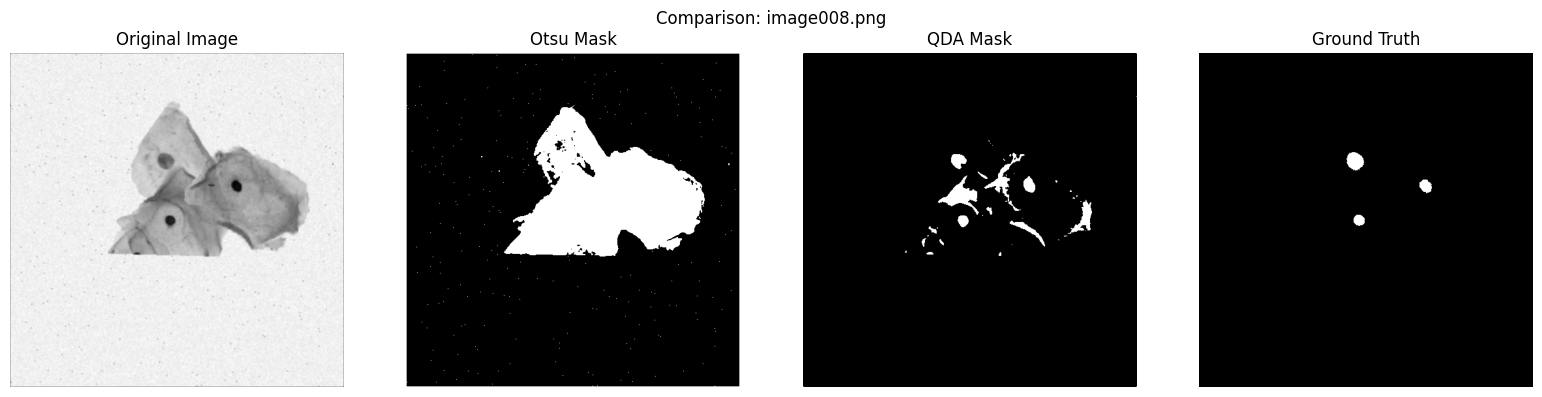

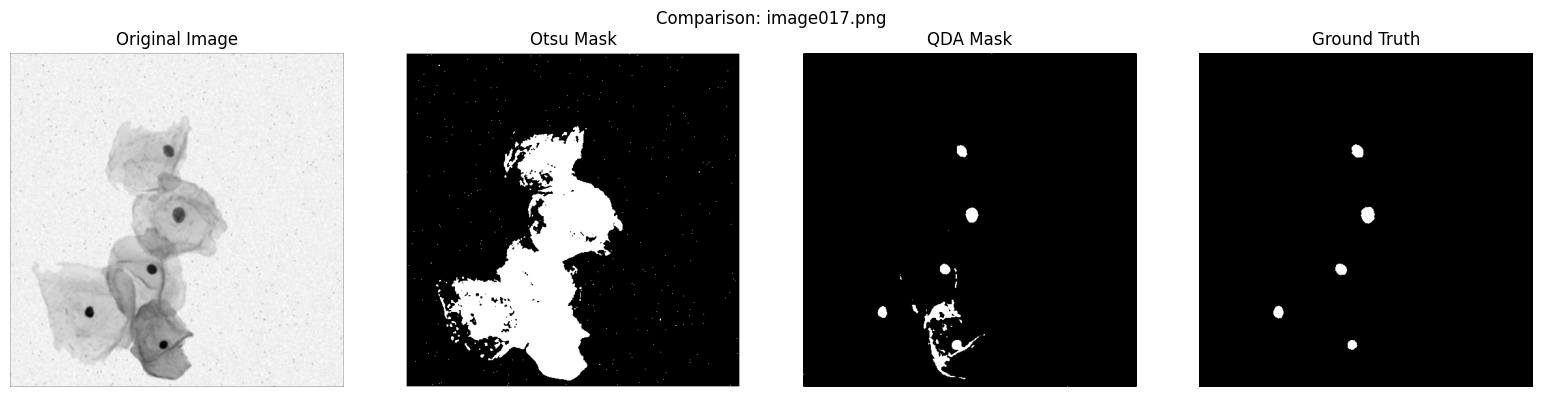

In [ ]:
num_tests = len(test_img_paths)
for i in range(min(2, num_tests)):
    img_name = os.path.basename(test_img_paths[i])

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    axes[0].imshow(io.imread(test_img_paths[i]), cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    if i < len(otsu_pred_masks):
        axes[1].imshow(otsu_pred_masks[i], cmap='gray')
        axes[1].set_title("Otsu Mask")
    axes[1].axis("off")

    if i < len(qda_pred_masks):
        axes[2].imshow(qda_pred_masks[i], cmap='gray')
        axes[2].set_title("QDA Mask")
    axes[2].axis("off")

    if i < len(qda_gt_masks) and qda_gt_masks[i] is not None:
        axes[3].imshow(qda_gt_masks[i], cmap='gray')
        axes[3].set_title("Ground Truth")
    axes[3].axis("off")

    plt.suptitle(f"Comparison: {img_name}")
    plt.tight_layout()
    plt.show()

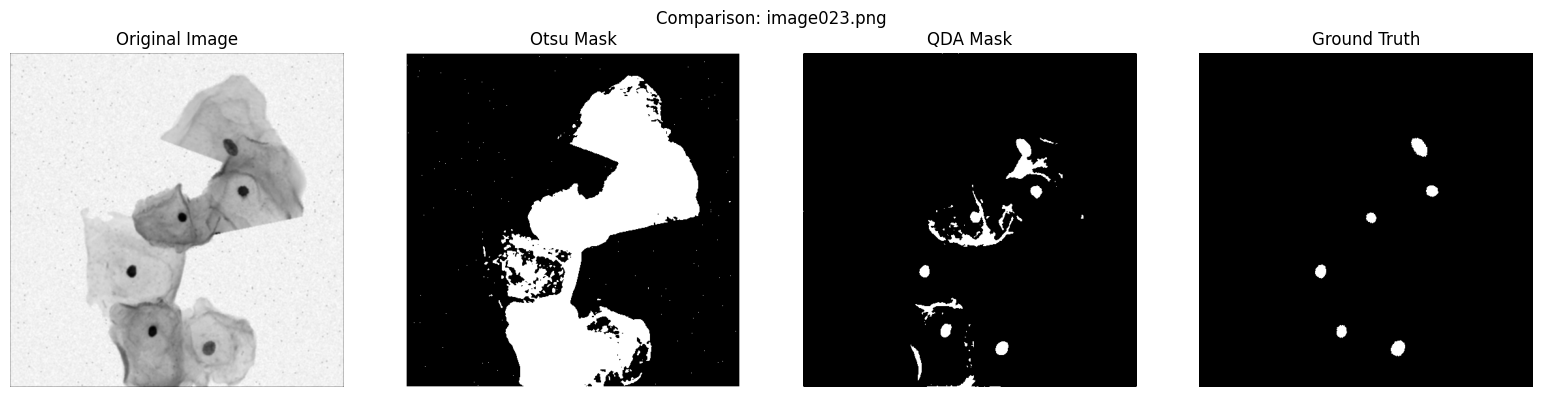

In [ ]:
i = 2
img_name = os.path.basename(test_img_paths[i])

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(io.imread(test_img_paths[i]), cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

if i < len(otsu_pred_masks):
  axes[1].imshow(otsu_pred_masks[i], cmap='gray')
  axes[1].set_title("Otsu Mask")
  axes[1].axis("off")

  if i < len(qda_pred_masks):
      axes[2].imshow(qda_pred_masks[i], cmap='gray')
      axes[2].set_title("QDA Mask")
  axes[2].axis("off")

  if i < len(qda_gt_masks) and qda_gt_masks[i] is not None:
       axes[3].imshow(qda_gt_masks[i], cmap='gray')
       axes[3].set_title("Ground Truth")
  axes[3].axis("off")

  plt.suptitle(f"Comparison: {img_name}")
  plt.tight_layout()
  plt.show()

On the test set, the supervised QDA model clearly outperforms simple Otsu thresholding. The Otsu method, being unsupervised and global, fails to capture subtle intensity variations and produces very low Dice (≈0.05) and Jaccard (≈0.03) scores. In contrast, the QDA model leverages labeled training data, achieving higher Dice (≈0.40) and Jaccard (≈0.25), and better outlines the nuclei.

Theoretical improvements:

- For unsupervised methods, local thresholding or adaptive clustering could help separate nuclei from background more accurately.

- For supervised methods, additional preprocessing (denoising, contrast enhancement) and more training samples would likely improve generalization. Also, using multi-feature models (not just intensity, e.g., texture) could improve segmentation.

Overall, supervised models trained on representative, preprocessed images are expected to outperform simple thresholding on complex test images.